## Importation des librairies et chargement des données

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
import seaborn as sns 

In [ ]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )


## Préprocessing

In [ ]:
# Découverte du jeu de données en affichant les 10 premières lignes 
df_train.head(10)

,music_id,chroma_0_mean,chroma_0_std,chroma_10_mean,chroma_10_std,chroma_11_mean,chroma_11_std,chroma_1_mean,chroma_1_std,chroma_2_mean,chroma_2_std,chroma_3_mean,chroma_3_std,chroma_4_mean,chroma_4_std,chroma_5_mean,chroma_5_std,chroma_6_mean,chroma_6_std,chroma_7_mean,chroma_7_std,chroma_8_mean,chroma_8_std,chroma_9_mean,chroma_9_std,chroma_centroid_mean,chroma_flux_mean,chroma_max,chroma_min,chroma_spread_mean,mfcc_10_mean,mfcc_10_std,mfcc_11_mean,mfcc_11_std,mfcc_12_mean,mfcc_12_std,mfcc_13_mean,mfcc_13_std,mfcc_2_mean,mfcc_2_std,mfcc_3_mean,mfcc_3_std,mfcc_4_mean,mfcc_4_std,mfcc_5_mean,mfcc_5_std,mfcc_6_mean,mfcc_6_std,mfcc_7_mean,mfcc_7_std,mfcc_8_mean,mfcc_8_std,mfcc_9_mean,mfcc_9_std,onset_rate,spectral_centroid_mean,spectral_decrease_mean,spectral_flux_mean,spectral_rolloff_mean,spectral_spread_mean,zcr_mean,zcr_std,category
0,0,866.507629,1585.437134,415.300842,710.790771,683.865845,1011.552856,473.484100,744.247925,304.914825,363.313141,332.242950,495.701813,312.017944,441.582794,309.633270,618.010193,471.462738,809.607849,755.778870,1522.247559,501.252075,1400.412354,402.114380,1302.272095,5.339493,1475.534790,20956.414062,3.068383,11.477202,-0.525435,0.575163,-0.079708,0.545337,0.242505,0.666833,-0.077199,0.523446,0.475172,1.139485,0.233085,1.578942,0.447061,1.009801,2.449972,1.163223,0.197224,0.726277,0.512699,0.585949,-0.010838,0.638230,0.156972,0.647313,3.631719,27.621587,-0.186330,1.962404,1525.877193,1579.021838,190.907164,149.482276,1
1,1,832.956909,2140.568115,287.584564,281.795380,405.467224,754.076904,1061.359863,2263.894531,2502.509033,6418.287109,1511.616821,3109.064209,1199.946289,2618.626953,653.007812,1048.274902,416.184937,628.753235,421.898773,1001.003784,395.224396,711.315369,462.371216,760.764343,4.913901,2480.159668,28161.671875,1.292808,6.465735,-0.065183,0.575794,0.207679,0.615899,0.089987,0.750274,0.448575,0.641309,0.160724,1.157852,0.089591,0.879492,0.317067,0.897643,2.001377,0.653011,NaN,0.851986,0.112410,0.653063,0.223518,0.627313,-0.515713,0.575588,6.230564,38.780628,-0.013198,2.139456,1740.789474,1941.791036,257.913214,171.257592,3
2,2,331.544586,553.657532,260.467499,327.618225,283.580139,312.385986,204.369690,225.922531,286.470215,396.768219,293.830261,261.392212,443.067322,570.670898,265.855835,339.594543,258.869629,241.156082,524.083435,664.791260,279.469452,273.887482,385.145294,668.300964,5.663275,618.680725,9198.053711,2.820759,9.908858,0.290645,0.813242,0.074028,0.755149,-0.607588,0.825031,0.071684,0.916140,-0.300894,0.734057,0.071280,0.728366,0.636152,0.573851,0.895578,0.647668,0.131983,0.780951,0.128582,0.632040,-0.119467,0.673518,-0.002418,0.837297,4.264771,86.371120,-0.155013,1.336048,5243.859649,15422.032531,508.122337,296.141124,3
3,3,454.521851,1170.188110,601.021790,1035.021240,721.523865,1861.131836,350.991791,495.942383,432.551971,563.184021,423.724396,614.654785,575.497986,1217.105225,427.940979,740.218872,424.519958,693.202209,475.514801,813.019714,469.719727,833.901611,590.138428,1158.055054,5.748345,1582.920410,25146.167969,6.649645,11.268784,0.099344,0.500206,0.186936,0.539651,-0.138668,0.613281,0.031876,0.533558,0.131419,1.178031,0.046957,1.178486,-0.889902,1.005922,1.706124,0.752769,-0.265338,0.733236,0.962989,0.560574,-0.014520,0.685316,0.257047,0.702976,4.064860,16.844325,-0.287745,2.207420,988.596491,999.051613,144.638374,142.303996,1
4,4,180.331635,245.818512,388.924744,917.082581,186.856262,192.765305,212.240402,370.108063,170.875610,225.814850,164.083847,214.766113,268.485291,402.826599,236.144547,398.438019,187.471344,290.566986,192.431625,324.297028,226.908310,410.174805,540.996704,1247.210938,5.763199,1106.660278,11508.416992,41.085251,9.236917,0.449522,0.526758,0.011300,0.538857,-0.217203,0.615165,-0.114352,0.517276,-0.157314,1.005643,-0.061574,0.934554,-0.233449,0.845138,1.283606,0.665571,-0.064535,0.724543,0.469437,0.602924,-0.017072,0.574132,0.212848,0.487534,4.164816,5.764473,-0.626706,1.263404,21.491228,735.051431,181.818928,106.604597,1
5,5,623.63

In [ ]:
df_train.category.value_counts() # On voit que la variable à prédire est répartie de manière équitable dans les données

3    80
2    80
1    80
0    80
Name: category, dtype: int64

In [ ]:
# On recherche les différentes infos sur les variables, leur type, le nombre de valeurs nulles etc...
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 63 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   music_id                320 non-null    int64  
 1   chroma_0_mean           317 non-null    float64
 2   chroma_0_std            317 non-null    float64
 3   chroma_10_mean          317 non-null    float64
 4   chroma_10_std           317 non-null    float64
 5   chroma_11_mean          318 non-null    float64
 6   chroma_11_std           320 non-null    float64
 7   chroma_1_mean           318 non-null    float64
 8   chroma_1_std            319 non-null    float64
 9   chroma_2_mean           316 non-null    float64
 10  chroma_2_std            317 non-null    float64
 11  chroma_3_mean           318 non-null    float64
 12  chroma_3_std            313 non-null    float64
 13  chroma_4_mean           316 non-null    float64
 14  chroma_4_std            316 non-null    fl

In [ ]:
df_train.shape
# On voit ici que le fichier train comporte 320 lignes pour 63 colonnes 
# Il va sans doute falloir diminuer le nombre de variables pour la suite du projet, surtout vu le peu de lignes que comporte le dataset

(320, 63)

In [ ]:
# Mais avant d'aller plus loin, on a pu voir précédemment qu'il y avait quelques valeurs nulles dans le dataset
# On les enlève en les remplçant par la moyenne
df_train = df_train.fillna(df_train.mean())
df_test = df_test.fillna(df_test.mean())

In [ ]:
df_train.shape

(320, 63)

In [ ]:
# On supprime également la colonne music_id qui ne sera pas utile à notre modèle
df_train.drop('music_id', axis=1, inplace=True)
df_test_id = df_test.music_id
df_test.drop('music_id', axis=1, inplace=True)

In [ ]:
df_train.shape

(320, 62)

In [ ]:
# On vérifie ici qu'il n'y a plus de valeurs nulles et que la colonne id a été retirée
df_train.isnull().sum().head(60)
# on aurait aussi pu refaire la vérification avec :
# df_train.info()

chroma_0_mean             0
chroma_0_std              0
chroma_10_mean            0
chroma_10_std             0
chroma_11_mean            0
chroma_11_std             0
chroma_1_mean             0
chroma_1_std              0
chroma_2_mean             0
chroma_2_std              0
chroma_3_mean             0
chroma_3_std              0
chroma_4_mean             0
chroma_4_std              0
chroma_5_mean             0
chroma_5_std              0
chroma_6_mean             0
chroma_6_std              0
chroma_7_mean             0
chroma_7_std              0
chroma_8_mean             0
chroma_8_std              0
chroma_9_mean             0
chroma_9_std              0
chroma_centroid_mean      0
chroma_flux_mean          0
chroma_max                0
chroma_min                0
chroma_spread_mean        0
mfcc_10_mean              0
mfcc_10_std               0
mfcc_11_mean              0
mfcc_11_std               0
mfcc_12_mean              0
mfcc_12_std               0
mfcc_13_mean        

## Normalisation des données

In [ ]:
# On applique un scaler aux données afin de faciliter la convergence du classificateur
from sklearn import preprocessing

scaler_train = preprocessing.StandardScaler().fit(df_train)
x_train_scaled = scaler_train.transform(df_train)

scaler_test = preprocessing.StandardScaler().fit(df_test)
x_test_scaled = scaler_test.transform(df_test)

x_train_scaled # Visualisation des données après le preprocessing

array([[ 1.3464954 ,  1.68633748, -0.09187765, ..., -0.01077823,
         0.63976297, -0.4472136 ],
       [ 1.23502811,  2.77756186, -0.54105494, ...,  0.61540494,
         1.04937978,  1.34164079],
       [-0.43083995, -0.34183801, -0.63642547, ...,  2.95365265,
         3.39857151,  1.34164079],
       ...,
       [-0.43653391, -0.49425678,  0.16533907, ..., -0.52767434,
        -0.49300181, -0.4472136 ],
       [-0.03997939, -0.68689412,  0.05282813, ..., -0.26910743,
        -0.87871633, -0.4472136 ],
       [ 1.61147343,  0.88283711,  1.40232284, ...,  1.46959032,
         1.89139651,  0.4472136 ]])

## Réduction dimensionnelle

In [ ]:
# Comme nous avons vu précédemment, le jeu de données possède beaucoup (trop) de variables
# Nous allons appliquer une ACP afin de voir quelles variables explicatives nous pouvons garder
from sklearn.decomposition import PCA

In [ ]:
pc = PCA(n_components=20)
pc = pc.fit(x_train_scaled)

print(pc.explained_variance_)
print(pc.explained_variance_ratio_) 

[15.54433462  9.04574289  4.13999441  3.6671216   3.24899881  2.82795352
  2.03753881  1.75738989  1.44148902  1.25761498  1.19006493  1.12750571
  1.05241129  1.0217599   0.95607228  0.88179233  0.84575858  0.78017216
  0.69791971  0.64440351]
[0.24993159 0.14544314 0.06656543 0.05896229 0.05223945 0.04546962
 0.03276083 0.02825642 0.02317717 0.02022072 0.01913461 0.01812875
 0.01692133 0.0164285  0.01537233 0.01417801 0.01359864 0.0125441
 0.01122159 0.01036112]


In [ ]:
eig = pd.DataFrame(
    {
        "Dimension" : ["Dim" + str(x + 1) for x in range(20)], 
        "Valeur propre" : pc.explained_variance_,
        "% variance expliquée" : np.round(pc.explained_variance_ratio_ * 100),
        "% cum. var. expliquée" : np.round(np.cumsum(pc.explained_variance_ratio_) * 100)
    },
    columns = ["Dimension", "Valeur propre", "% variance expliquée", "% cum. var. expliquée"]
)
eig

,Dimension,Valeur propre,% variance expliquée,% cum. var. expliquée
0,Dim1,15.544335,25.0,25.0
1,Dim2,9.045743,15.0,40.0
2,Dim3,4.139994,7.0,46.0
3,Dim4,3.667122,6.0,52.0
4,Dim5,3.248999,5.0,57.0
5,Dim6,2.827954,5.0,62.0
6,Dim7,2.037539,3.0,65.0
7,Dim8,1.757390,3.0,68.0
8,Dim9,1.441489,2.0,70.0
9,Dim10,1.257615,2.0,72.0


In [ ]:
x_train_PCA = pc.transform(x_train_scaled)
x_test_PCA = pc.fit(x_test_scaled)
x_test_PCA = pc.transform(x_test_scaled)

In [ ]:
x_train_PCA.shape

(320, 20)

## Tests des différents modèles

In [ ]:
from sklearn.model_selection import train_test_split 

target = df_train['category']

# On sépare le jeu de train grâce à train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_scaled, target, train_size=0.5)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 62)
(160, 62)
(160,)
(160,)


### Régression Logistique

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


best accuracy = 0.9270833333333334
obtenue à C = 0.1


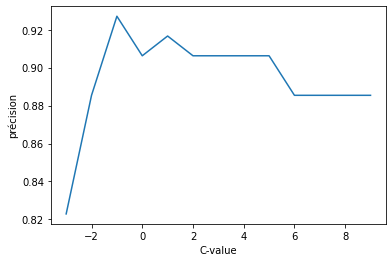

In [ ]:
# Première approche avec une régression logistique !
# Pour ce premier modèle, on envoie tout le jeu de données sans sélectionner les variables

from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
# Reshuffle des sets de train/test
x_train, x_test, y_train, y_test = train_test_split(x_train_PCA, target, train_size=0.7)

# Afficher l'accuracy pour différentes valeurs de C
result = []
C_values = [c for c in range(-3,10)]

for c in C_values:
    clf = LogisticRegression(random_state = 0 , C=10**c) # construction d'un classificateur de Régression logistique
    clf.fit(x_train, y_train) # Entrainement du modèle
    y_predict = clf.predict(x_test) # Test du modèle
    score = accuracy_score(y_predict, y_test) # Evaluation de l'accuracy
    result.append(score)

plt.plot(list(C_values), result)
plt.ylabel('précision')
plt.xlabel('C-value')

import numpy as np
print('best accuracy = ' + str(np.max(result)))
print('obtenue à C = ' + str(10**(C_values[np.argmax(result)])))


### KNN

best accuracy = 0.7916666666666666
obtained at n_value = 7


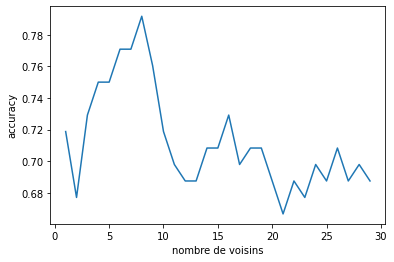

In [ ]:
# Deuxième approche avec un KNN !
# On envoie également tout le jeu de données sans sélectionner les variables

from sklearn import neighbors
from sklearn.metrics import accuracy_score # Pour évaluer la précision de la prediction

x_train, x_test, y_train, y_test = train_test_split(x_train_PCA, target, train_size=0.7, stratify=target)

result = []
n_values = range(1,30)
for n in n_values:
    clf = neighbors.KNeighborsClassifier(n_neighbors=n) # Classificateur paramétré sur n-voisins
    clf.fit(x_train, y_train)
    y_predict = clf.predict(x_test)
    score = accuracy_score(y_predict, y_test)
    result.append(score)

plt.plot(list(n_values), result)
plt.ylabel('accuracy')
plt.xlabel('nombre de voisins')

import numpy as np
print('best accuracy = ' + str(np.max(result)))
print('obtained at n_value = ' + str(np.argmax(result)))

### Naive Bayes

224 points, dont 46 mal classés


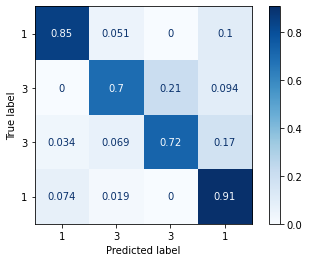

In [ ]:
# Approche Naives Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_train_PCA, target, test_size=0.7, random_state=0)

# Créer, entraîner le modèle, prédire
gnb = GaussianNB() # On fait l'hypothèse que la distribution des variables est gaussienne
y_pred = gnb.fit(X_train, y_train).predict(X_test) # Paf, entraînement et prédiction en une ligne
print(str(X_test.shape[0]) + " points, dont " + str((y_test != y_pred).sum()) + ' mal classés')

# Matrice de confusion
disp = plot_confusion_matrix(gnb, X_test, y_test,display_labels=target, cmap=plt.cm.Blues,normalize = 'true')

### Random Forest

In [ ]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
# Dernier modèle tenté : un random forest
# pour tester plusieurs hyperparametres, nous allons utiliser un randomizeSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x_train_PCA, target, test_size=0.7, random_state=0, stratify=target)

# Créer, entraîner le modèle, prédire
rfc = RandomForestClassifier(random_state=0) 

parameters = {'max_depth' : [2,3,4,5,6,7] , 'n_estimators' : [100,200,300,400,500,600] }
n_iter_search = 20
random_search = RandomizedSearchCV(rfc, param_distributions=parameters,
                                   n_iter=n_iter_search)

random_search.fit(X_train, y_train)
report(random_search.cv_results_)


Model with rank: 1
Mean validation score: 0.824 (std: 0.119)
Parameters: {'n_estimators': 600, 'max_depth': 5}

Model with rank: 1
Mean validation score: 0.824 (std: 0.110)
Parameters: {'n_estimators': 600, 'max_depth': 7}

Model with rank: 1
Mean validation score: 0.824 (std: 0.119)
Parameters: {'n_estimators': 500, 'max_depth': 5}



Les meilleurs résultats sont ceux obtenus avec la régression logistique

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train_PCA, target, train_size=0.7)
clf = LogisticRegression(random_state = 0 , C=0.1) 
clf.fit(x_train, y_train) # Entrainement du modèle
y_predict = clf.predict(x_test) # Test du modèle
score = accuracy_score(y_predict, y_test) # Evaluation de l'accuracy
print(score)

0.90625


In [ ]:
prediction_output = clf.predict(x_test_PCA)

In [ ]:
prediction_output

array([2, 1, 0, 3, 1, 2, 1, 2, 2, 2, 3, 1, 2, 3, 3, 0, 3, 0, 0, 0, 2, 3,
       1, 0, 3, 2, 3, 0, 0, 2, 1, 2, 3, 2, 0, 3, 3, 3, 1, 0, 1, 0, 1, 3,
       0, 3, 1, 0, 1, 3, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 3, 2, 0, 0, 1, 3,
       2, 3, 0, 2, 0, 1, 1, 2, 2, 0, 3, 3, 1, 0])

In [ ]:
output = pd.DataFrame({'music_id': df_test_id,'category': prediction_output})
output.to_csv('Submission.csv', index=False)